# Image processing operations 

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Get image

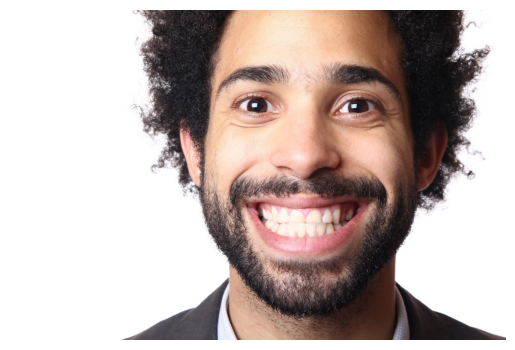

In [2]:
img = mpimg.imread('Smiling-Man.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

## Turning grayscale

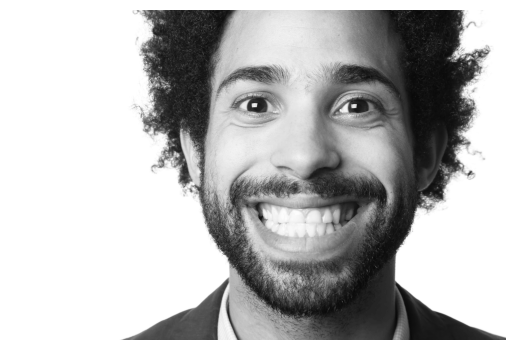

In [3]:
red_scale = 0.2989
green_scale = 0.5870
blue_scale = 0.1140
img = np.dot(img[..., :3], [red_scale, green_scale, blue_scale])

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Crop image

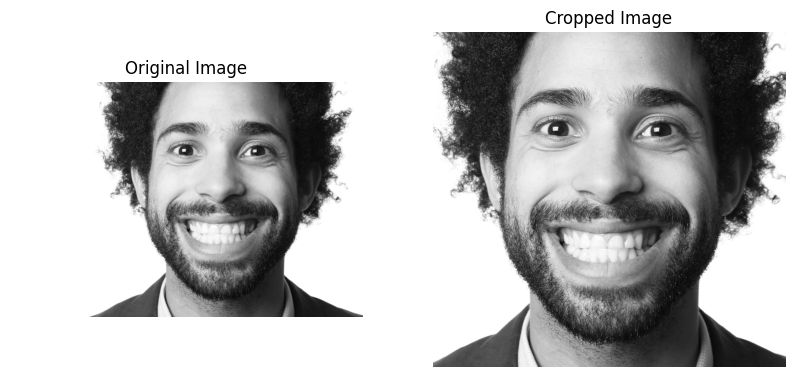

In [4]:
left_percentage = 0.25 
right_percentage = 0.05 

width = img.shape[1]
left_width = int(width * left_percentage)
right_width = int(width * right_percentage)

cropped_img = img[:, left_width:-right_width]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cropped_img, cmap='gray')
axes[1].set_title('Cropped Image')
axes[1].axis('off')

plt.show()
img = cropped_img.astype(np.uint8)

## Adding border to the image

In [ ]:
border_colors = {'left': 0, 'right': 0, 'top': 200, 'bottom': 200}
border_widths = {'left': 20, 'right': 40, 'top': 15, 'bottom': 25}

border_img = img.copy()

for side, color in border_colors.items():
    border_width = border_widths[side]
    if side == 'left':
        border_img = np.pad(border_img, ((0, 0), (border_width, 0)), mode='constant', constant_values=color)
    elif side == 'right':
        border_img = np.pad(border_img, ((0, 0), (0, border_width)), mode='constant', constant_values=color)
    elif side == 'top':
        border_img = np.pad(border_img, ((border_width, 0), (0, 0)), mode='constant', constant_values=color)
    elif side == 'bottom':
        border_img = np.pad(border_img, ((0, border_width), (0, 0)), mode='constant', constant_values=color)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(border_img, cmap='gray')
axes[1].set_title('Image with Custom Borders')
axes[1].axis('off')

plt.show()

## Setting diagonal values

In [ ]:
diagonal_image = img.copy()
for i in range(min(diagonal_image.shape[0],diagonal_image.shape[1])):
    diagonal_image[i][i] = 0
    
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(diagonal_image, cmap='gray')
axes[1].set_title('Image with Custom Borders')
axes[1].axis('off')

plt.show()

## Adding border value(Not getting it)

In [ ]:
border_color = 0  # Set border color to black for grayscale
border_width = 10
image_shape = img.shape
border_image = np.ones((image_shape[0] + 2 * border_width, image_shape[1] + 2 * border_width), dtype=np.uint8)
border_image *= border_color  # Set entire border to the specified color
border_image[border_width:-border_width, border_width:-border_width] = img  # Overlay the grayscale image

# Plot images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two axes
axes[0].imshow(img, cmap='gray')  # Plot the original image on the first axis
axes[0].axis('off')  # Turn off axis for the first image
axes[1].imshow(border_image, cmap='gray')  # Plot the image with border on the second axis
axes[1].axis('off')  # Turn off axis for the second image
plt.show()

## Making a different image

In [ ]:
upside_img = np.flipud(img)
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[1].imshow(upside_img, cmap='gray')
axes[1].axis('off')
plt.show()

In [ ]:
def arith_operation (img1, img2, operation):
    result = img1.copy()
    if operation == '+':
        for i in range (img1.shape[0]):
            for j in range (img1.shape[1]):
                result[i][j] = min(img1[i][j] + img2[i][j], 255)
    elif operation == '-':
        for i in range (img1.shape[0]):
            for j in range (img1.shape[1]):
                result[i][j] = max(img1[i][j] - img2[i][j], 0)
    elif operation == '&':
        img1 = img1.astype(int)
        img2 = img2.astype(int)
        for i in range (img1.shape[0]):
            for j in range (img1.shape[1]):
                result[i][j] = min((img1[i][j]) & (img2[i][j]), 255)
    elif operation == '|':
        img1 = img1.astype(int)
        img2 = img2.astype(int)
        for i in range (img1.shape[0]):
            for j in range (img1.shape[1]):
                result[i][j] = min((img1[i][j]) | (img2[i][j]), 255)
    return result

addition_result = arith_operation(img, upside_img, '+')
subtraction_result = arith_operation(img, upside_img, '-')
logical_and_result = arith_operation(img, upside_img, '&')
logical_or_result = arith_operation(img, upside_img, '|')

fig, axes = plt.subplots(3, 2, figsize=(15,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(upside_img, cmap='gray')
axes[0,1].set_title('Upside down image')
axes[0,1].axis('off')

axes[1,0].imshow(addition_result, cmap='gray')
axes[1,0].set_title('Addition Image')
axes[1,0].axis('off')

axes[1,1].imshow(subtraction_result, cmap='gray')
axes[1,1].set_title('Subtracted image')
axes[1,1].axis('off')

axes[2,0].imshow(logical_and_result, cmap='gray')
axes[2,0].set_title('AND Image')
axes[2,0].axis('off')
# 
axes[2,1].imshow(logical_or_result, cmap='gray')
axes[2,1].set_title('OR image')
axes[2,1].axis('off')

plt.tight_layout()
plt.show()

## Creating histogram

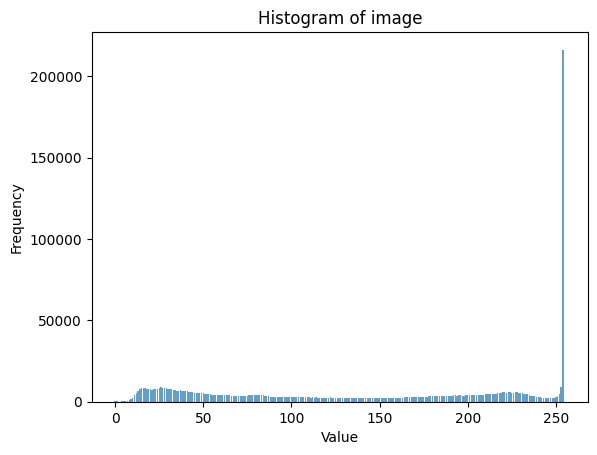

In [10]:
def make_histogram(img):
    hist = np.zeros(256, dtype=int)
    int_img = img.astype(np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[int_img[i][j]] += 1
    return hist

plt.bar(range(256), make_histogram(img), align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of image')
plt.show()

# hist, bins = np.histogram(img, bins=256, range=(0, 256))
# 
# # Plot the histogram
# plt.bar(bins[:-1], hist, align='center', width=1)
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.title('Histogram of Grayscale Image')
# plt.show()

## Histogram equalizing

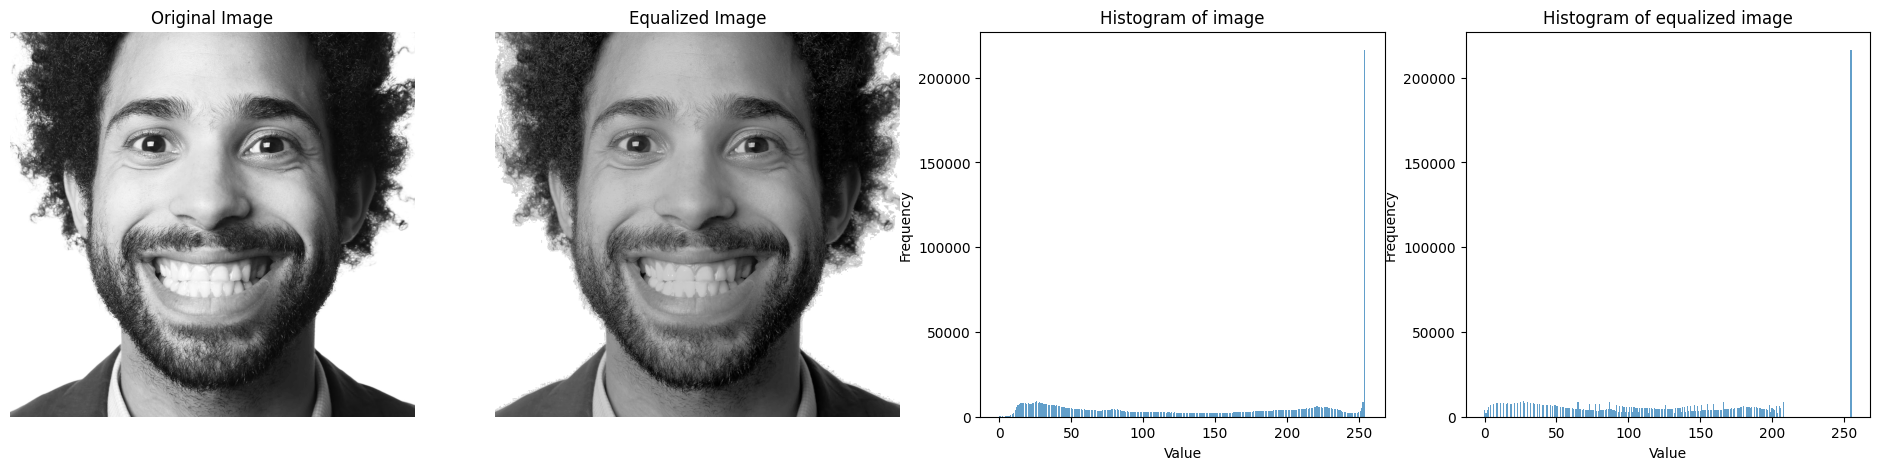

In [13]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0,256))
    
    cdf = hist.cumsum()
    
    cdf_normalized = cdf / cdf.max()
    
    lookup_table = (cdf_normalized * 255).astype('uint8')
    
    equalized_img = lookup_table[image]
    
    return equalized_img

equalized_img = histogram_equalization(img)

plt.figure(figsize=(24, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.bar(range(256), make_histogram(img), align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of image')

plt.subplot(1,4,4)
plt.bar(range(256), make_histogram(equalized_img), align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of equalized image')

plt.show()

## Image sharpening

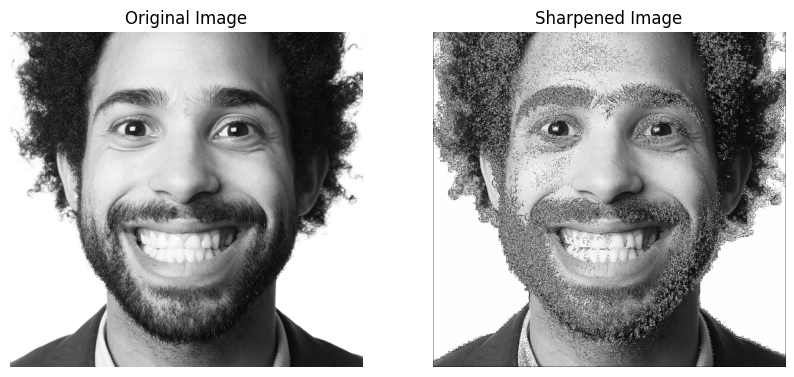

In [20]:
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    
    sharpened_img = np.zeros_like(img)
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            sharpened_img[i, j] = np.sum(img[i-1:i+2, j-1:j+2] * kernel)
            sharpened_img[i, j] = max(0, sharpened_img[i, j])
            sharpened_img[i, j] = min(255, sharpened_img[i, j])

    return sharpened_img

sharpened_img = sharpen_image(img)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()